In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path_to_train = '/content/drive/MyDrive/Colab Notebooks/MNIST_training_set.npy'
path_to_test = '/content/drive/MyDrive/Colab Notebooks/MNIST_test_set.npy'

d_train = np.load(path_to_train, allow_pickle=True)
d_test = np.load(path_to_test, allow_pickle=True)

In [5]:
X_train = d_train.item().get('features')
Y_train = d_train.item().get('labels')

print(X_train.shape)
print(Y_train.shape)

X_test = d_test.item().get('features')
Y_test = d_test.item().get('labels')

print(X_test.shape)
print(Y_test.shape)

(2000, 256)
(2000,)
(500, 256)
(500,)


In [6]:
pca = PCA(n_components=256)
pca.fit(X_train)

PCA(n_components=256)

(256, 256)


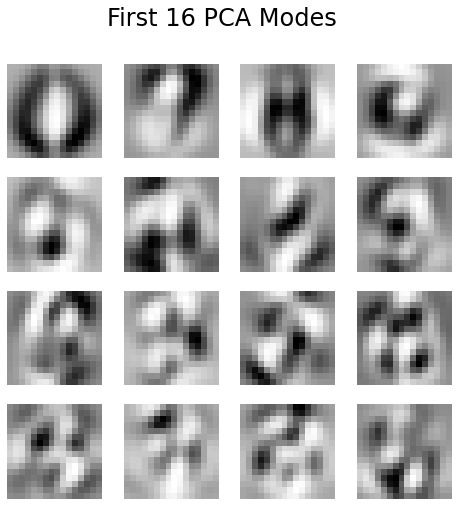

In [7]:
def plot_digits(XX, N, title):
    """Small helper function to plot N**2 digits."""
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[(N)*i+j,:].reshape((16, 16)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(pca.components_, 4, "First 16 PCA Modes" )

print(pca.components_.shape)

Text(0, 0.5, '$\\sigma_j$')

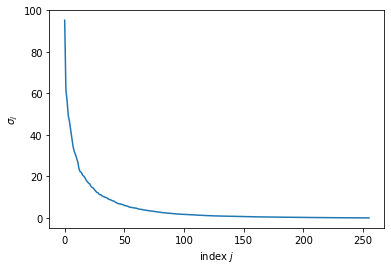

In [8]:
plt.plot(pca.singular_values_)
plt.xlabel('index $j$')
plt.ylabel('$\sigma_j$')


In [9]:
import numpy as np

pca = PCA()
pca.fit(X_train)
print(np.sqrt(sum(pca.singular_values_**2)))

190.27893628308198


In [10]:
pca = PCA(0.6**2)
pca.fit(X_train)
print(pca.components_.shape)

pca = PCA(0.8**2)
pca.fit(X_train)
print(pca.components_.shape)

pca = PCA(0.9**2)
pca.fit(X_train)
print(pca.components_.shape)

(3, 256)
(7, 256)
(14, 256)


In [11]:
def get_XY(X,Y,m,n):
  indexm = np.where(Y == m)
  X_mn = X[indexm]
  Y_mn = Y[indexm]
  indexn = np.where(Y == n)
  X_mn = np.vstack((X_mn,X[indexn]))
  Y_mn = np.hstack((Y_mn,Y[indexn]))
  return X_mn,Y_mn


In [12]:
def classifier(m,n):
  X_train_mn = get_XY(X_train,Y_train,m,n)[0]
  Y_train_mn = get_XY(X_train,Y_train,m,n)[1]

  pca = PCA(n_components=16)
  pca.fit(X_train)
  A_train = pca.transform(X_train_mn)

  b_train = Y_train_mn
  indexm = np.where(Y_train_mn == m)
  b_train[indexm] = -1
  indexn = np.where(Y_train_mn == n)
  b_train[indexn] = 1

  reg = RidgeCV()
  reg.fit(A_train,b_train)
  predictor = reg.predict(A_train)

  MSE_train_mn = mean_squared_error(b_train, predictor)
  print("MSE_train(",m,",",n,"): ",MSE_train_mn)

  X_test_mn = get_XY(X_test,Y_test,m,n)[0]
  Y_test_mn = get_XY(X_test,Y_test,m,n)[1]

  A_test = pca.transform(X_test_mn)

  b_test = Y_test_mn
  indexm = np.where(Y_test_mn == m)
  b_test[indexm] = -1
  indexn = np.where(Y_test_mn == n)
  b_test[indexn] = 1

  predictor = reg.predict(A_test)
  MSE_test_mn = mean_squared_error(b_test, predictor)
  print("MSE_test (",m,",",n,"): ",MSE_test_mn)


In [13]:
classifier(1,8)
classifier(3,8)
classifier(2,7)

MSE_train( 1 , 8 ):  0.07545046193479041
MSE_test ( 1 , 8 ):  0.0825830416996403
MSE_train( 3 , 8 ):  0.18121824942014883
MSE_test ( 3 , 8 ):  0.2591148603960329
MSE_train( 2 , 7 ):  0.09284760866898845
MSE_test ( 2 , 7 ):  0.13143223499625878
